Loading logs/cam_stats_run_2.json
Loaded 871 layer statistics for 18 checkpoints.


,model,head,method,layer_index,threshold,iou
0,cnn_species_breed_bbox,ClassifierHead(2),GradCAM,0,0.0,0.25
1,cnn_species_breed_bbox,ClassifierHead(2),GradCAM,1,0.0,0.38
2,cnn_species_breed_bbox,ClassifierHead(2),GradCAM,2,0.0,0.22
3,cnn_species_breed_bbox,ClassifierHead(2),GradCAM,3,0.0,0.40
4,cnn_species_breed_bbox,ClassifierHead(37),GradCAM,0,0.0,0.26


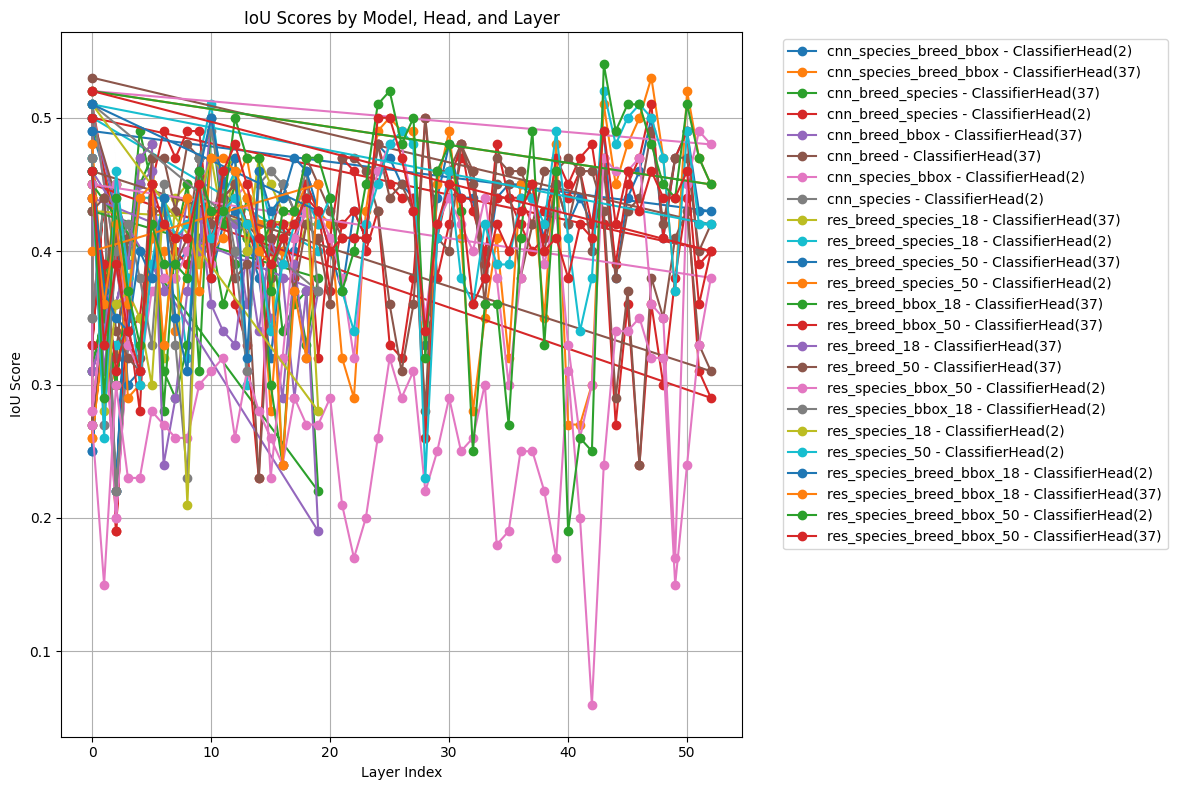


Best performing layers for each model and head:


,model,head,method,layer_index,threshold,iou,rank
0,res_species_breed_bbox_50,ClassifierHead(2),GradCAM,43,0.0,0.54,1
1,res_breed_species_50,ClassifierHead(2),GradCAM,47,0.0,0.53,2
2,res_breed_50,ClassifierHead(37),ClassicCAM,0,0.0,0.53,3
3,res_species_breed_bbox_50,ClassifierHead(37),ClassicCAM,0,0.0,0.52,4
4,res_species_bbox_50,ClassifierHead(2),ClassicCAM,0,0.0,0.52,5
5,res_species_50,ClassifierHead(2),GradCAM,43,0.0,0.52,6
6,res_breed_bbox_50,ClassifierHead(37),GradCAM,47,0.0,0.51,7
7,res_species_breed_bbox_18,ClassifierHead(2),ClassicCAM,0,0.0,0.51,8
8,res_species_bbox_18,ClassifierHead(2),ClassicCAM,0,0.0,0.51,9
9,res_species_18,ClassifierHead(2),ClassicCAM,0,0.0,0.51,10


In [34]:
import json
import os
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Load the CAM statistics from the JSON file
def load_cam_stats(json_path: str = "logs/cam_stats.json") -> Dict:
    """
    Load CAM statistics from a JSON file.

    Args:
        json_path (str): Path to the JSON file containing CAM statistics.

    Returns:
        Dict: Dictionary containing the CAM statistics.
    """
    print(f"Loading {json_path}")
    with open(json_path, "r") as f:
        cam_stats = json.load(f)
    return cam_stats


# Convert the JSON data to a pandas DataFrame
def cam_stats_to_dataframe(cam_stats: Dict) -> pd.DataFrame:
    """
    Convert CAM statistics from a dictionary to a pandas DataFrame.

    Args:
        cam_stats (Dict): Dictionary containing CAM statistics.

    Returns:
        pd.DataFrame: DataFrame with columns for model, head, method, layer_index, threshold, and iou.
    """
    rows = []

    for model_name, settings in cam_stats.items():
        for setting_name, layers in settings.items():
            # Parse the setting name to extract head and method
            head, method = setting_name.split("_", 1)
            head = head.split("-")[0]
            for layer in layers:
                rows.append(
                    {
                        "model": model_name,
                        "head": head,
                        "method": method,
                        "layer_index": layer["layer_index"],
                        "threshold": layer["threshold"],
                        "iou": layer["iou"],
                    }
                )

    return pd.DataFrame(rows)


### RUN SETTING
run_name = "run_2"


# Load the CAM statistics and convert to DataFrame
cam_stats = load_cam_stats(os.path.join("logs", "cam_stats_" + run_name + ".json"))
cam_df = cam_stats_to_dataframe(cam_stats)


num_checkpoints_df = len(cam_df["model"].unique())
num_checkpoint_files = len(
    [f for f in os.listdir(os.path.join("checkpoints", run_name)) if f.endswith(".pt")]
)
assert num_checkpoints_df == num_checkpoint_files, (
    f"Unexpected number of checkpoints in cam_stats file, found {num_checkpoints_df}, expected {num_checkpoint_files}"
)

# Display the first few rows of the DataFrame
print(f"Loaded {len(cam_df)} layer statistics for {num_checkpoints_df} checkpoints.")

display(cam_df.head())

# Visualize the IoU scores for different models and heads
plt.figure(figsize=(12, 8))
for model in cam_df["model"].unique():
    model_data = cam_df[cam_df["model"] == model]
    for head in model_data["head"].unique():
        head_data = model_data[model_data["head"] == head]
        plt.plot(
            head_data["layer_index"],
            head_data["iou"],
            marker="o",
            label=f"{model} - {head}",
        )

plt.xlabel("Layer Index")
plt.ylabel("IoU Score")
plt.title("IoU Scores by Model, Head, and Layer")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the best performing layers for each model and head
best_layers = cam_df.loc[cam_df.groupby(["model", "head"])["iou"].idxmax()]
print("\nBest performing layers for each model and head:")
display(
    best_layers[["model", "head", "method", "layer_index", "threshold", "iou"]]
    .sort_values("iou", ascending=False)
    .reset_index(drop=True)
    .assign(rank=lambda x: x.index + 1)
)

## Is pre-training performance predictive of CAM quality?


Species (2 classes) analysis:
Number of models analyzed: 8
                       model  best_validation_acc  best_iou
0             res_species_18             0.989170      0.51
1  res_species_breed_bbox_50             0.998195      0.54
2        res_species_bbox_18             0.992780      0.51
3  res_species_breed_bbox_18             0.996390      0.51
4       res_breed_species_18             0.995487      0.51
5       res_breed_species_50             1.000000      0.53
6        res_species_bbox_50             0.997292      0.52
7             res_species_50             0.996390      0.52
Pearson correlation: 0.688
P-value: 0.059


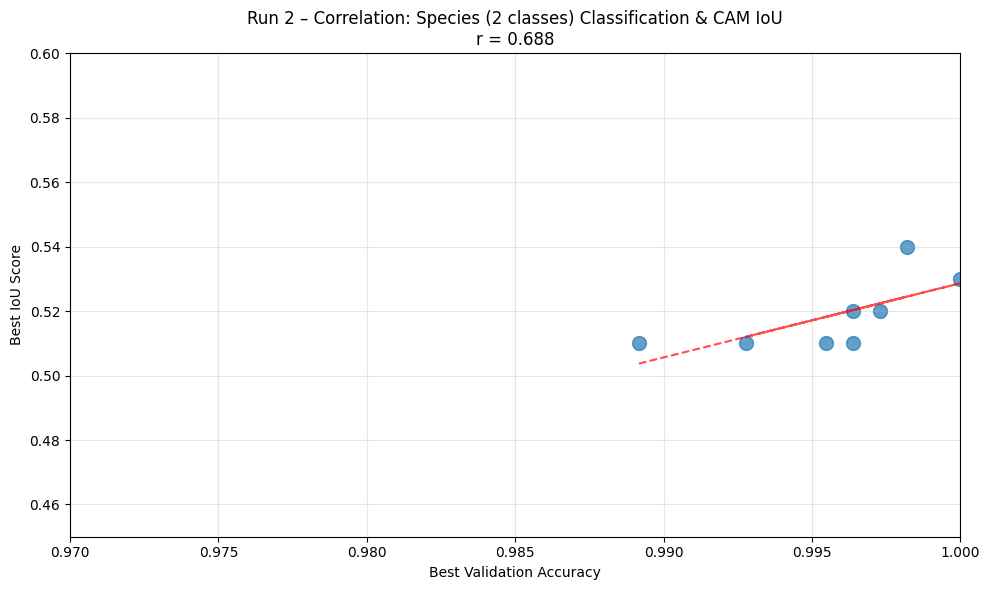


Breed (37 classes) analysis:
Number of models analyzed: 8
                       model  best_validation_acc  best_iou
0          res_breed_bbox_18             0.888087      0.50
1  res_species_breed_bbox_50             0.856498      0.52
2          res_breed_bbox_50             0.880866      0.51
3  res_species_breed_bbox_18             0.902527      0.47
4       res_breed_species_18             0.901625      0.48
5       res_breed_species_50             0.868231      0.50
6               res_breed_50             0.878159      0.53
7               res_breed_18             0.870036      0.50
Pearson correlation: -0.736
P-value: 0.037


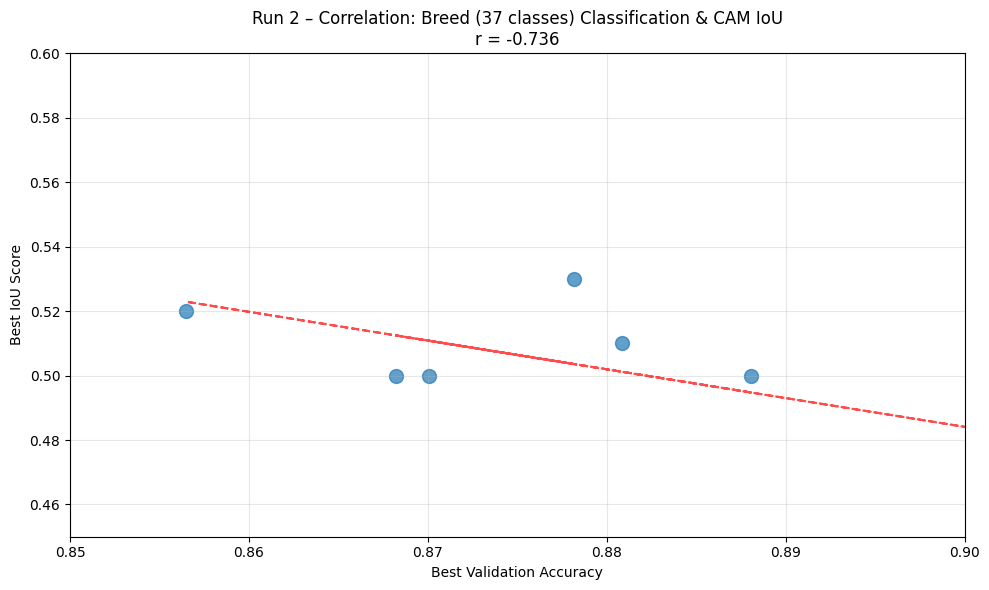

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr


# Load the data
def load_data(run_name: str):
    # Load CAM statistics
    with open("logs/cam_stats_" + run_name + ".json", "r") as f:
        cam_stats = json.load(f)

    run_number = run_name[-1]
    # Load pretraining logs
    with open("logs/pretraining" + run_number + ".json", "r") as f:
        pretraining = json.load(f)

    return cam_stats, pretraining


# Extract best IoU for each model by classifier head
def get_best_iou_scores_by_head(cam_stats, exclude_cnn=False):
    best_iou = {"ClassifierHead(2)": {}, "ClassifierHead(37)": {}}

    for model_name, settings in cam_stats.items():
        # Skip CNN models if exclude_cnn is True
        if exclude_cnn and model_name.startswith("cnn_"):
            continue

        for setting_name, layers in settings.items():
            head = setting_name.split("_")[0].split("-")[0]
            if head not in best_iou:
                continue

            if model_name not in best_iou[head]:
                best_iou[head][model_name] = 0

            for layer in layers:
                best_iou[head][model_name] = max(
                    best_iou[head][model_name], layer["iou"]
                )

    return best_iou


# Extract best validation accuracy for each model by classifier head
def get_best_val_acc_by_head(pretraining, exclude_cnn=False):
    best_acc = {"ClassifierHead(2)": {}, "ClassifierHead(37)": {}}

    for model_name, epochs in pretraining.items():
        # Skip CNN models if exclude_cnn is True
        if exclude_cnn and model_name.startswith("cnn_"):
            continue

        # Find the highest validation accuracy for each head
        for head in best_acc.keys():
            model_best_acc = 0
            for epoch, metrics in epochs.items():
                acc_key = f"val_{head}_Acc"
                if acc_key in metrics:
                    model_best_acc = max(model_best_acc, metrics[acc_key])

            if model_best_acc > 0:  # Only add if model has this head
                best_acc[head][model_name] = model_best_acc

    return best_acc


# Create dataframe for analysis by head
def create_analysis_df_by_head(best_iou, best_acc):
    dataframes = {}

    for head in ["ClassifierHead(2)", "ClassifierHead(37)"]:
        data = []
        for model in set(best_iou[head].keys()) & set(best_acc[head].keys()):
            best_accuracy = best_acc[head][model]

            data.append(
                {
                    "model": model,
                    "best_validation_acc": best_accuracy,
                    "best_iou": best_iou[head][model],
                }
            )
        dataframes[head] = pd.DataFrame(data)

    return dataframes


# Plot the correlation for a specific head
def plot_correlation(df, head_name, title_prefix="", y_range=None, x_range=None):
    display_name = (
        "Species (2 classes)"
        if "ClassifierHead(2)" in head_name
        else "Breed (37 classes)"
    )

    plt.figure(figsize=(10, 6))

    # Create scatter plot
    plt.scatter(df["best_validation_acc"], df["best_iou"], s=100, alpha=0.7)

    # Add model names as labels
    for i, model in enumerate(df["model"]):
        # Adjust vertical position for bbox models
        y_offset = 17 if "species" in model else 7
        # plt.annotate(model,             (df['best_validation_acc'].iloc[i], df['best_iou'].iloc[i]), textcoords="offset points",  xytext=(0, y_offset),  ha='center')

    # Calculate and plot trend line
    if len(df) > 1:
        z = np.polyfit(df["best_validation_acc"], df["best_iou"], 1)
        p = np.poly1d(z)
        plt.plot(
            df["best_validation_acc"], p(df["best_validation_acc"]), "r--", alpha=0.7
        )

        # Calculate Pearson correlation
        corr, p_value = pearsonr(df["best_validation_acc"], df["best_iou"])
        plt.title(
            f"{title_prefix}Correlation: {display_name} Classification & CAM IoU\nr = {corr:.3f}"
        )  # , p = {p_value:.3f}')
    else:
        plt.title(f"{title_prefix}Correlation: {display_name} Classification & CAM IoU")

    plt.xlabel("Best Validation Accuracy")
    plt.ylabel("Best IoU Score")
    plt.grid(True, alpha=0.3)

    # Set axis ranges if provided
    if y_range is not None:
        plt.ylim(y_range)
    if x_range is not None:
        plt.xlim(x_range)

    # Print summary statistics
    print(f"\n{display_name} analysis:")
    print(f"Number of models analyzed: {len(df)}")
    print(df)

    if len(df) > 1:
        print(f"Pearson correlation: {corr:.3f}")
        print(f"P-value: {p_value:.3f}")

    plt.tight_layout()
    plt.show()


# Main analysis
def main():
    exclude_cnn = True
    cam_stats, pretraining = load_data(run_name=run_name)
    best_iou = get_best_iou_scores_by_head(cam_stats, exclude_cnn=exclude_cnn)
    best_acc = get_best_val_acc_by_head(pretraining, exclude_cnn=exclude_cnn)
    dataframes = create_analysis_df_by_head(best_iou, best_acc)

    # Plot correlation for species classification (2 classes)
    plot_correlation(
        dataframes["ClassifierHead(2)"],
        "ClassifierHead(2)",
        title_prefix="Run 2 – ",
        y_range=(0.45, 0.6),
        x_range=(0.97, 1.0),
    )

    # Plot correlation for breed classification (37 classes)
    plot_correlation(
        dataframes["ClassifierHead(37)"],
        "ClassifierHead(37)",
        title_prefix="Run 2 – ",
        y_range=(0.45, 0.6),
        x_range=(0.85, 0.9),
    )


if __name__ == "__main__":
    main()

## Comparing Single-Head CAM Performances

Loading logs/cam_stats_run_2.json
              model                head      method  layer_index  threshold  \
49        cnn_breed  ClassifierHead(37)  ClassicCAM            0        0.0   
48        cnn_breed  ClassifierHead(37)     GradCAM            3        0.0   
67      cnn_species   ClassifierHead(2)  ClassicCAM            0        0.0   
64      cnn_species   ClassifierHead(2)     GradCAM            1        0.0   
410    res_breed_18  ClassifierHead(37)  ClassicCAM            0        0.0   
400    res_breed_18  ClassifierHead(37)     GradCAM           10        0.0   
517    res_breed_50  ClassifierHead(37)  ClassicCAM            0        0.0   
439    res_breed_50  ClassifierHead(37)     GradCAM           28        0.0   
666  res_species_18   ClassifierHead(2)  ClassicCAM            0        0.0   
656  res_species_18   ClassifierHead(2)     GradCAM           10        0.0   
720  res_species_50   ClassifierHead(2)  ClassicCAM            0        0.0   
710  res_species_5

,architecture,u_statistic,p_value,effect_size,significant
0,cnn,41.0,1.000000,-0.038462,False
1,res18,534.0,0.124920,0.315539,False
2,res50,2954.5,0.815531,0.059460,False



Summary Statistics (Best CAM Performance):
CNN: Species IoU: 0.475, Breed IoU: 0.455, Absolute Diff: 0.020, Relative Diff: 4.4%
  Best layers - Species: 0, Breed: 0
RES18: Species IoU: 0.490, Breed IoU: 0.470, Absolute Diff: 0.020, Relative Diff: 4.3%
  Best layers - Species: 0, Breed: 0
RES50: Species IoU: 0.515, Breed IoU: 0.515, Absolute Diff: 0.000, Relative Diff: 0.0%
  Best layers - Species: 0, Breed: 0


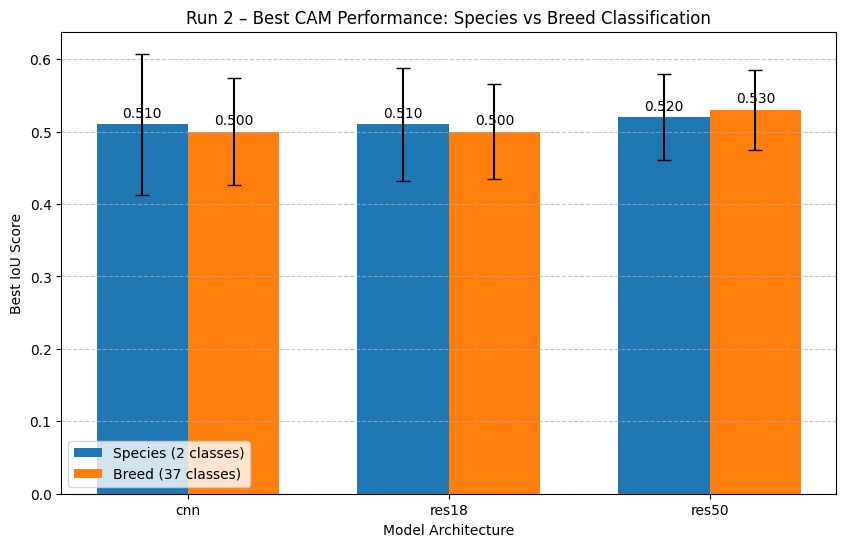

In [37]:
# Function to determine model size/architecture
def get_model_size(model_name):
    if "cnn" in model_name:
        return "cnn"
    elif "res" in model_name and "18" in model_name:
        return "res18"
    elif "res" in model_name and "50" in model_name:
        return "res50"
    else:
        return "other"


# Function to determine if a model is multi-head
def is_multi_head(model_name):
    # Check if model has both species and breed in name
    has_species = "species" in model_name
    has_breed = "breed" in model_name
    has_bbox = "bbox" in model_name
    return has_species and has_breed or has_bbox


def compare_species_vs_breed_cam_performance(title_prefix: str = None):
    """
    Creates a comprehensive analysis of species vs breed CAM performance
    across different model architectures with statistical significance testing
    and visualization enhancements.
    """
    # Load data
    json_path = os.path.join("logs", "cam_stats_" + run_name + ".json")
    cam_stats = load_cam_stats(json_path)
    df = cam_stats_to_dataframe(cam_stats)

    # Add model architecture column
    df["architecture"] = df["model"].apply(get_model_size)

    # Filter to keep only the relevant architectures
    df = df[df["architecture"].isin(["cnn", "res18", "res50"])]

    # Filter out multi-head models
    df = df[~df["model"].apply(is_multi_head)]

    # Create a more comprehensive analysis with additional metrics

    # 1. Find best layer for each model-head combination
    best_layers = df.loc[df.groupby(["model", "head", "method"])["iou"].idxmax()]
    print(best_layers)
    # 2. Group by model, architecture, and head to analyze variability
    model_results = (
        df.groupby(["model", "architecture", "head"])
        .agg({"iou": ["max", "mean", "std"]})
        .reset_index()
    )

    print(model_results)

    # Flatten multi-index columns
    model_results.columns = [
        "_".join(col).strip("_") for col in model_results.columns.values
    ]

    # 3. Run statistical tests between species and breed IoU scores
    stats_results = []
    for arch in ["cnn", "res18", "res50"]:
        arch_data = df[df["architecture"] == arch]

        # Get species and breed data
        species_data = arch_data[arch_data["head"] == "ClassifierHead(2)"]["iou"]
        breed_data = arch_data[arch_data["head"] == "ClassifierHead(37)"]["iou"]

        # Only run stats test if we have enough data
        if len(species_data) > 0 and len(breed_data) > 0:
            # Perform Mann-Whitney U test (non-parametric)
            u_stat, p_value = scipy.stats.mannwhitneyu(
                species_data, breed_data, alternative="two-sided"
            )

            # Calculate effect size (Cohen's d)
            effect_size = (species_data.mean() - breed_data.mean()) / np.sqrt(
                (
                    (len(species_data) - 1) * species_data.var()
                    + (len(breed_data) - 1) * breed_data.var()
                )
                / (len(species_data) + len(breed_data) - 2)
            )

            stats_results.append(
                {
                    "architecture": arch,
                    "u_statistic": u_stat,
                    "p_value": p_value,
                    "effect_size": effect_size,
                    "significant": p_value < 0.05,
                }
            )

    stats_df = pd.DataFrame(stats_results)

    # 4. Create the grouped bar chart
    architectures = ["cnn", "res18", "res50"]
    species_max = []
    breed_max = []
    species_std = []
    breed_std = []

    for arch in architectures:
        # Filter for this architecture
        arch_data = model_results[model_results["architecture"] == arch]

        # Get species data
        species_rows = arch_data[arch_data["head"] == "ClassifierHead(2)"]
        if not species_rows.empty:
            # Use the maximum value if there are multiple rows
            species_max.append(species_rows["iou_max"].max())
            # Calculate the average standard deviation if there are multiple rows
            species_std.append(species_rows["iou_std"].mean())
        else:
            species_max.append(0)
            species_std.append(0)

        # Get breed data
        breed_rows = arch_data[arch_data["head"] == "ClassifierHead(37)"]
        if not breed_rows.empty:
            # Use the maximum value if there are multiple rows
            breed_max.append(breed_rows["iou_max"].max())
            # Calculate the average standard deviation if there are multiple rows
            breed_std.append(breed_rows["iou_std"].mean())
        else:
            breed_max.append(0)
            breed_std.append(0)

    # Create a more informative visualization
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot 1: Max IoU scores (best performance)
    x = np.arange(len(architectures))
    width = 0.35

    species_bars = ax1.bar(
        x - width / 2, species_max, width, label="Species (2 classes)"
    )
    breed_bars = ax1.bar(x + width / 2, breed_max, width, label="Breed (37 classes)")

    # Add error bars
    ax1.errorbar(
        x - width / 2,
        species_max,
        yerr=species_std,
        fmt="none",
        ecolor="black",
        capsize=5,
    )
    ax1.errorbar(
        x + width / 2, breed_max, yerr=breed_std, fmt="none", ecolor="black", capsize=5
    )

    # Add value labels on top of bars
    for i, v in enumerate(species_max):
        ax1.text(i - width / 2, v + 0.01, f"{v:.3f}", ha="center")

    for i, v in enumerate(breed_max):
        ax1.text(i + width / 2, v + 0.01, f"{v:.3f}", ha="center")

    # Add labels and title
    ax1.set_xlabel("Model Architecture")
    ax1.set_ylabel("Best IoU Score")
    ax1.set_title(
        title_prefix + "Best CAM Performance: Species vs Breed Classification"
    )
    ax1.set_xticks(x)
    ax1.set_xticklabels(architectures)
    ax1.legend()
    ax1.grid(axis="y", linestyle="--", alpha=0.7)

    # Print statistical results
    print("\nStatistical Testing Results:")
    display(stats_df)

    # Print summary statistics with differences
    print("\nSummary Statistics (Best CAM Performance):")
    for arch in ["cnn", "res18", "res50"]:
        arch_data = best_layers[best_layers["architecture"] == arch]
        species_data = arch_data[arch_data["head"] == "ClassifierHead(2)"]
        breed_data = arch_data[arch_data["head"] == "ClassifierHead(37)"]

        if len(species_data) > 0 and len(breed_data) > 0:
            species_iou = species_data["iou"].mean()
            breed_iou = breed_data["iou"].mean()
            diff = species_iou - breed_iou
            percent_diff = (diff / breed_iou) * 100 if breed_iou > 0 else float("inf")

            print(
                f"{arch.upper()}: Species IoU: {species_iou:.3f}, Breed IoU: {breed_iou:.3f}, "
                + f"Absolute Diff: {diff:.3f}, Relative Diff: {percent_diff:.1f}%"
            )

            # Add insights about which layers perform best
            best_species_layer = species_data["layer_index"].iloc[0]
            best_breed_layer = breed_data["layer_index"].iloc[0]
            print(
                f"  Best layers - Species: {best_species_layer}, Breed: {best_breed_layer}"
            )


# Don't forget to import necessary libraries
import scipy.stats

# Call the function
text = (
    "Run 2 – " if run_name == "run_2" else "Run 3 – " if run_name == "run_3" else None
)
compare_species_vs_breed_cam_performance(title_prefix=text)

## Is GradCAM or ClassicCAM better?

Loading logs/cam_stats_run_2.json

Statistical Testing Results (Species):


""



Statistical Testing Results (Breed):


,architecture,u_statistic,p_value,effect_size,significant
0,cnn,0.0,0.001312,-3.967101,True
1,res18,163.0,0.278522,-0.555637,False
2,res50,13.5,0.000752,-1.814465,True


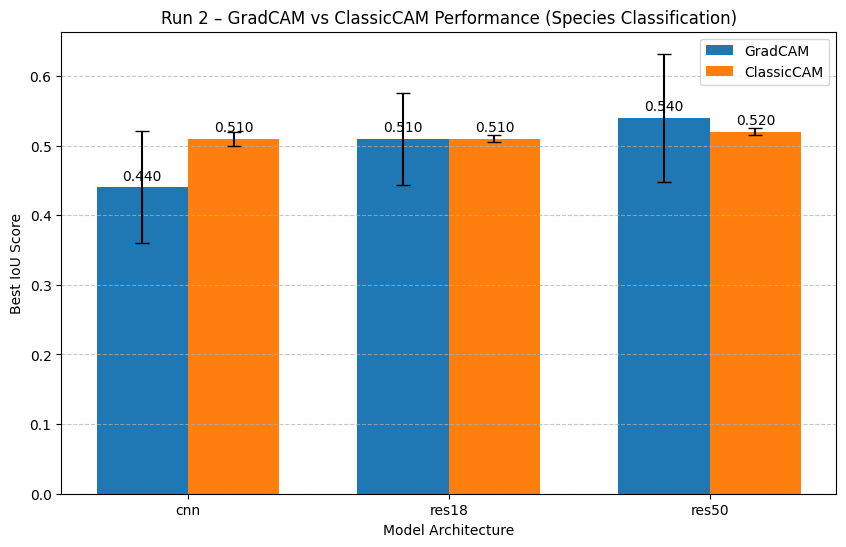

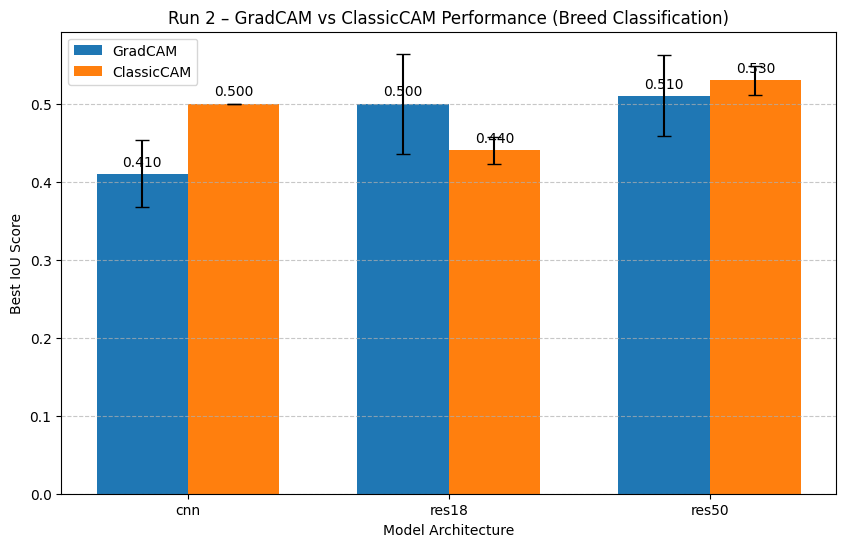

In [ ]:
# Function to determine model size/architecture
def get_model_size(model_name):
    if "cnn" in model_name:
        return "cnn"
    elif "res" in model_name and "18" in model_name:
        return "res18"
    elif "res" in model_name and "50" in model_name:
        return "res50"
    else:
        return "other"


def compare_gradcam_vs_classiccam_performance(title_prefix: str = None):
    """
    Compares GradCAM vs ClassicCAM performance across different model architectures
    """
    # Load data
    json_path = os.path.join("logs", "cam_stats_" + run_name + ".json")
    cam_stats = load_cam_stats(json_path)
    df = cam_stats_to_dataframe(cam_stats)

    # Add architecture column and filter data
    df["architecture"] = df["model"].apply(get_model_size)
    df = df[df["architecture"].isin(["cnn", "res18", "res50"])]

    # Find best layer for each model-method combination
    best_layers = df.loc[df.groupby(["model", "method"])["iou"].idxmax()]

    # Prepare data for visualization
    architectures = ["cnn", "res18", "res50"]

    # Create dataframes for statistical testing
    stats_results_species = []
    stats_results_breed = []

    # Prepare data for plotting
    gradcam_species_scores = []
    classiccam_species_scores = []
    gradcam_breed_scores = []
    classiccam_breed_scores = []

    # For error bars
    gradcam_species_std = []
    classiccam_species_std = []
    gradcam_breed_std = []
    classiccam_breed_std = []

    for arch in architectures:
        arch_data = df[df["architecture"] == arch]

        # Process species data
        species_data = arch_data[arch_data["head"] == "ClassifierHead(2)"]
        if not species_data.empty:
            gradcam_species = species_data[species_data["method"] == "GradCAM"]["iou"]
            classiccam_species = species_data[species_data["method"] == "ClassicCAM"][
                "iou"
            ]

            # Store max scores for plotting
            gradcam_species_scores.append(
                gradcam_species.max() if not gradcam_species.empty else 0
            )
            classiccam_species_scores.append(
                classiccam_species.max() if not classiccam_species.empty else 0
            )

            # Store standard deviations for error bars
            gradcam_species_std.append(
                gradcam_species.std()
                if not gradcam_species.empty and len(gradcam_species) > 1
                else 0
            )
            classiccam_species_std.append(
                classiccam_species.std()
                if not classiccam_species.empty and len(classiccam_species) > 1
                else 0
            )

            # Statistical testing
            if len(gradcam_species) > 0 and len(classiccam_species) > 0:
                u_stat, p_value = scipy.stats.mannwhitneyu(
                    gradcam_species, classiccam_species, alternative="two-sided"
                )
                effect_size = (
                    gradcam_species.mean() - classiccam_species.mean()
                ) / np.sqrt(
                    (
                        (len(gradcam_species) - 1) * gradcam_species.var()
                        + (len(classiccam_species) - 1) * classiccam_species.var()
                    )
                    / (len(gradcam_species) + len(classiccam_species) - 2)
                )
        else:
            gradcam_species_scores.append(0)
            classiccam_species_scores.append(0)
            gradcam_species_std.append(0)
            classiccam_species_std.append(0)

        # Process breed data
        breed_data = arch_data[arch_data["head"] == "ClassifierHead(37)"]
        if not breed_data.empty:
            gradcam_breed = breed_data[breed_data["method"] == "GradCAM"]["iou"]
            classiccam_breed = breed_data[breed_data["method"] == "ClassicCAM"]["iou"]

            # Store max scores for plotting
            gradcam_breed_scores.append(
                gradcam_breed.max() if not gradcam_breed.empty else 0
            )
            classiccam_breed_scores.append(
                classiccam_breed.max() if not classiccam_breed.empty else 0
            )

            # Store standard deviations for error bars
            gradcam_breed_std.append(
                gradcam_breed.std()
                if not gradcam_breed.empty and len(gradcam_breed) > 1
                else 0
            )
            classiccam_breed_std.append(
                classiccam_breed.std()
                if not classiccam_breed.empty and len(classiccam_breed) > 1
                else 0
            )

            # Statistical testing
            if len(gradcam_breed) > 0 and len(classiccam_breed) > 0:
                u_stat, p_value = scipy.stats.mannwhitneyu(
                    gradcam_breed, classiccam_breed, alternative="two-sided"
                )
                effect_size = (
                    gradcam_breed.mean() - classiccam_breed.mean()
                ) / np.sqrt(
                    (
                        (len(gradcam_breed) - 1) * gradcam_breed.var()
                        + (len(classiccam_breed) - 1) * classiccam_breed.var()
                    )
                    / (len(gradcam_breed) + len(classiccam_breed) - 2)
                )
        else:
            gradcam_breed_scores.append(0)
            classiccam_breed_scores.append(0)
            gradcam_breed_std.append(0)
            classiccam_breed_std.append(0)

    # Create dataframes for stats results
    stats_df_species = pd.DataFrame(stats_results_species)
    stats_df_breed = pd.DataFrame(stats_results_breed)

    # Plot species results
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    x = np.arange(len(architectures))
    width = 0.35

    ax1.bar(
        x - width / 2,
        gradcam_species_scores,
        width,
        label="GradCAM",
        yerr=gradcam_species_std,
        capsize=5,
    )
    ax1.bar(
        x + width / 2,
        classiccam_species_scores,
        width,
        label="ClassicCAM",
        yerr=classiccam_species_std,
        capsize=5,
    )

    # Add value labels
    for i, v in enumerate(gradcam_species_scores):
        ax1.text(i - width / 2, v + 0.01, f"{v:.3f}", ha="center")
    for i, v in enumerate(classiccam_species_scores):
        ax1.text(i + width / 2, v + 0.01, f"{v:.3f}", ha="center")

    ax1.set_xlabel("Model Architecture")
    ax1.set_ylabel("Best IoU Score")
    ax1.set_title(
        title_prefix + "GradCAM vs ClassicCAM Performance (Species Classification)"
    )
    ax1.set_xticks(x)
    ax1.set_xticklabels(architectures)
    ax1.legend()
    ax1.grid(axis="y", linestyle="--", alpha=0.7)

    # Plot breed results
    fig2, ax2 = plt.subplots(figsize=(10, 6))

    ax2.bar(
        x - width / 2,
        gradcam_breed_scores,
        width,
        label="GradCAM",
        yerr=gradcam_breed_std,
        capsize=5,
    )
    ax2.bar(
        x + width / 2,
        classiccam_breed_scores,
        width,
        label="ClassicCAM",
        yerr=classiccam_breed_std,
        capsize=5,
    )

    # Add value labels
    for i, v in enumerate(gradcam_breed_scores):
        ax2.text(i - width / 2, v + 0.01, f"{v:.3f}", ha="center")
    for i, v in enumerate(classiccam_breed_scores):
        ax2.text(i + width / 2, v + 0.01, f"{v:.3f}", ha="center")

    ax2.set_xlabel("Model Architecture")
    ax2.set_ylabel("Best IoU Score")
    ax2.set_title(
        title_prefix + "GradCAM vs ClassicCAM Performance (Breed Classification)"
    )
    ax2.set_xticks(x)
    ax2.set_xticklabels(architectures)
    ax2.legend()
    ax2.grid(axis="y", linestyle="--", alpha=0.7)


# Call the function
text = (
    "Run 2 – " if run_name == "run_2" else "Run 3 – " if run_name == "run_3" else None
)
compare_gradcam_vs_classiccam_performance(title_prefix=text)

## Comparing Multi-Head vs Single-Head CAM Performance
This analysis compares the CAM IoU scores between models with multiple heads (e.g., species+breed) versus models with single heads (e.g., only species or only breed) to see if multi-task learning  improves CAM quality.

cnn :
Species only scores: [0.44, 0.51, 0.44]
Breed only scores: [0.41, 0.5, 0.41]
Multi scores: [0.37, 0.44, 0.5, 0.37, 0.51, 0.44]
Species to Multi (cnn): -5.40%
Breed to Multi (cnn): -0.38%
Average improvement (cnn): -2.89%
res18 :
Species only scores: [0.47, 0.51]
Breed only scores: [0.48, 0.5, 0.44]
Multi scores: [0.48, 0.51, 0.43, 0.5]
Species to Multi (res18): -2.04%
Breed to Multi (res18): 1.41%
Average improvement (res18): -0.32%
res50 :
Species only scores: [0.52, 0.51]
Breed only scores: [0.5, 0.49, 0.53]
Multi scores: [0.5, 0.53, 0.49, 0.52]
Species to Multi (res50): -0.97%
Breed to Multi (res50): 0.66%
Average improvement (res50): -0.16%


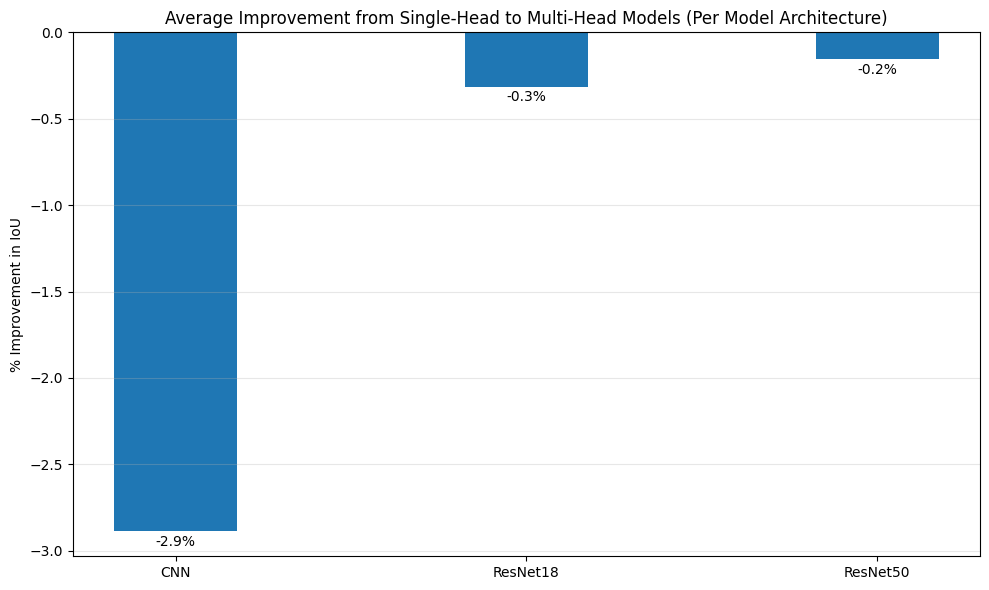

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Function to determine the starting point (species-only or breed-only)
def get_starting_point(model_name):
    if "species" in model_name and "breed" not in model_name:
        return "species_only"
    elif "breed" in model_name and "species" not in model_name:
        return "breed_only"
    else:
        return "multi"  # Already multi-head


# Function to determine the starting point (species-only or breed-only)
def get_starting_point(model_name):
    if "species" in model_name and "breed" not in model_name:
        return "species_only"
    elif "breed" in model_name and "species" not in model_name:
        return "breed_only"
    else:
        return "multi"  # Already multi-head


# Extract IoU scores categorized by model architecture and starting point
def get_categorized_iou_scores(cam_stats, exclude_dict=None):
    if exclude_dict is None:
        exclude_dict = {}

    # Structure to hold single-head and multi-head models
    results = {
        "single": {
            "species_only": {"cnn": [], "res18": [], "res50": []},
            "breed_only": {"cnn": [], "res18": [], "res50": []},
        },
        "multi": {"cnn": [], "res18": [], "res50": []},
    }

    for model_name, settings in cam_stats.items():
        # Skip models based on exclude_dict
        skip = False
        for key in exclude_dict:
            if key in model_name and exclude_dict[key]:
                skip = True
                break
        if skip:
            continue

        is_multi = is_multi_head(model_name)
        model_size = get_model_size(model_name)

        if model_size not in ["cnn", "res18", "res50"]:
            continue

        for setting_name, layers in settings.items():
            head = setting_name.split("_")[0].split("-")[0]
            cam_name = setting_name.split("_")[1]

            # Find best IoU for this model and head
            best_iou = 0
            for layer in layers:
                best_iou = max(best_iou, layer["iou"])

            # Add to appropriate category
            if is_multi:
                results["multi"][model_size].append(
                    {
                        "model": model_name,
                        "head": head,
                        "cam": cam_name,
                        "iou": best_iou,
                    }
                )
            else:
                starting_point = get_starting_point(model_name)
                if starting_point in results["single"]:
                    results["single"][starting_point][model_size].append(
                        {
                            "model": model_name,
                            "head": head,
                            "cam": cam_name,
                            "iou": best_iou,
                        }
                    )

    return results


# Calculate average improvement from each starting point to multi-head
def calculate_improvements(categorized_scores):
    improvements = {
        "species_to_multi": {"cnn": 0, "res18": 0, "res50": 0},
        "breed_to_multi": {"cnn": 0, "res18": 0, "res50": 0},
        "average": {"cnn": 0, "res18": 0, "res50": 0},
    }

    for model_size in ["cnn", "res18", "res50"]:
        # Calculate species-only to multi-head improvement
        species_only_scores = [
            item["iou"]
            for item in categorized_scores["single"]["species_only"][model_size]
        ]
        breed_only_scores = [
            item["iou"]
            for item in categorized_scores["single"]["breed_only"][model_size]
        ]
        multi_scores = [item["iou"] for item in categorized_scores["multi"][model_size]]
        print(model_size, ":")
        print("Species only scores:", species_only_scores)
        print("Breed only scores:", breed_only_scores)
        print("Multi scores:", multi_scores)
        if species_only_scores and multi_scores:
            species_avg = np.mean(species_only_scores)
            multi_avg = np.mean(multi_scores)
            species_improvement = ((multi_avg - species_avg) / species_avg) * 100
            improvements["species_to_multi"][model_size] = species_improvement
            print(f"Species to Multi ({model_size}): {species_improvement:.2f}%")
        else:
            improvements["species_to_multi"][model_size] = np.nan

        if breed_only_scores and multi_scores:
            breed_avg = np.mean(breed_only_scores)
            multi_avg = np.mean(multi_scores)
            breed_improvement = ((multi_avg - breed_avg) / breed_avg) * 100
            improvements["breed_to_multi"][model_size] = breed_improvement
            print(f"Breed to Multi ({model_size}): {breed_improvement:.2f}%")
        else:
            improvements["breed_to_multi"][model_size] = np.nan

        # Calculate average improvement
        valid_improvements = []
        if not np.isnan(improvements["species_to_multi"][model_size]):
            valid_improvements.append(improvements["species_to_multi"][model_size])
        if not np.isnan(improvements["breed_to_multi"][model_size]):
            valid_improvements.append(improvements["breed_to_multi"][model_size])

        if valid_improvements:
            improvements["average"][model_size] = np.mean(valid_improvements)
            print(
                f"Average improvement ({model_size}): {improvements['average'][model_size]:.2f}%"
            )
        else:
            improvements["average"][model_size] = np.nan

    return improvements


# Get categorized scores
categorized_scores = get_categorized_iou_scores(cam_stats, exclude_dict={"bbox": True})

# Calculate improvements
improvements = calculate_improvements(categorized_scores)

# Create bar chart of average improvements
fig, ax = plt.subplots(figsize=(10, 6))

model_sizes = ["cnn", "res18", "res50"]
display_names = ["CNN", "ResNet18", "ResNet50"]
x = np.arange(len(model_sizes))
width = 0.35

values = [improvements["average"][size] for size in model_sizes]
# Replace NaN with 0 for plotting
values = [0 if np.isnan(v) else v for v in values]

bars = ax.bar(x, values, width)

# Add value labels on top of bars
for j, bar in enumerate(bars):
    if not np.isnan(improvements["average"][model_sizes[j]]):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.1 if height > 0 else height - 0.1,
            f"{values[j]:.1f}%",
            ha="center",
            va="bottom",
        )

ax.set_title(
    "Average Improvement from Single-Head to Multi-Head Models (Per Model Architecture)"
)
ax.set_ylabel("% Improvement in IoU")
ax.set_xticks(x)
ax.set_xticklabels(display_names)
ax.axhline(y=0, color="k", linestyle="-", alpha=0.3)
ax.grid(True, axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

cnn_species_breed_bbox
cnn_breed_species
cnn_breed_bbox
cnn_breed
cnn_species_bbox
cnn_species
res_breed_species_18
res_breed_species_50
res_breed_bbox_18
res_breed_bbox_50
res_breed_18
res_breed_50
res_species_bbox_50
res_species_bbox_18
res_species_18
res_species_50
res_species_breed_bbox_18
res_species_breed_bbox_50

Species (2 classes) - Best Layers Analysis:
Number of models: 1


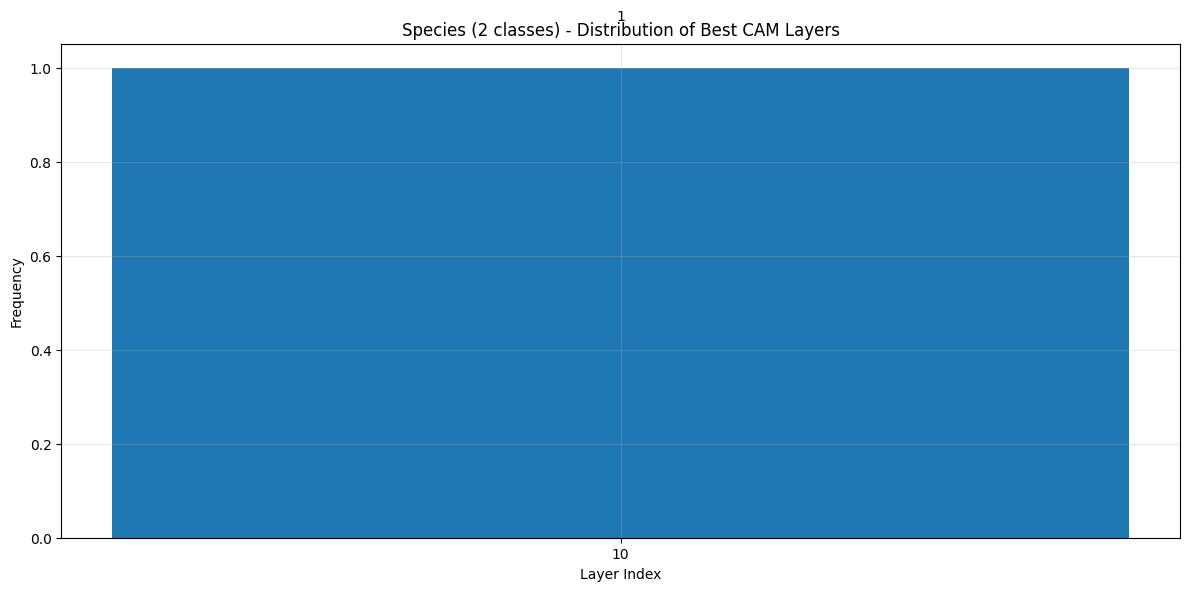


Top 5 models by IoU:
                  model  layer_index   iou
0  res_breed_species_18           10  0.51

Breed (37 classes) - Best Layers Analysis:
Number of models: 3


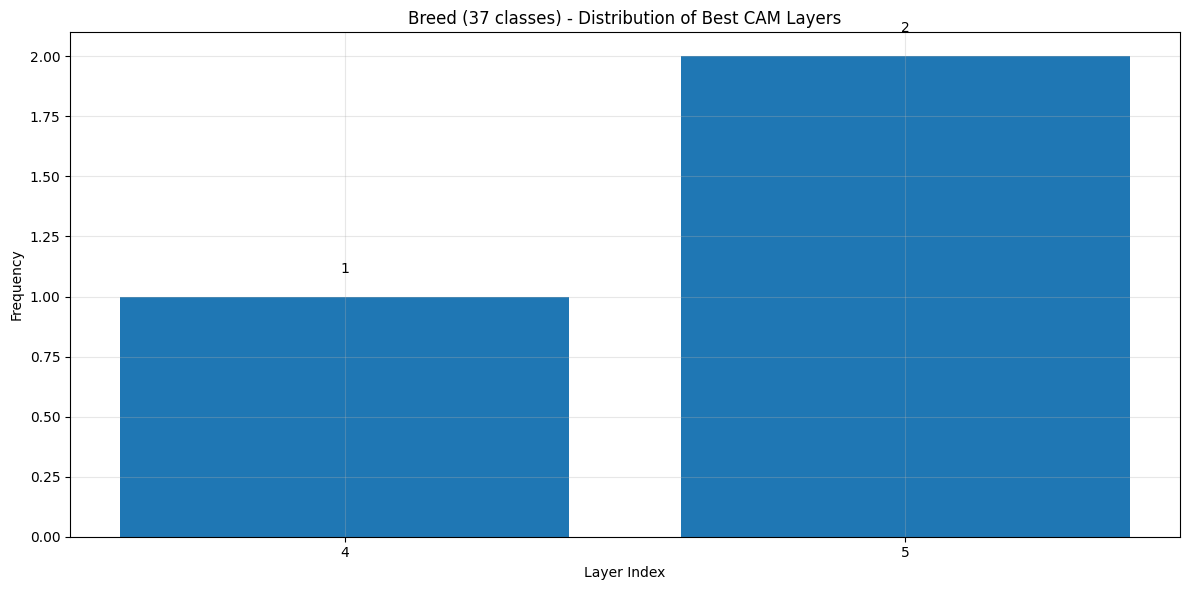


Top 5 models by IoU:
                  model  layer_index   iou
1     res_breed_bbox_18            4  0.49
0  res_breed_species_18            5  0.48
2          res_breed_18            5  0.48


In [ ]:
# %% [markdown]
# ## Analyzing Best Layer for CAM Generation
#
# This analysis identifies which layers tend to produce the best CAM results across different models.

# %%
# Extract best layer for each model by head type
def get_best_layers(cam_stats, exclude_dict=None):
    if exclude_dict is None:
        exclude_dict = {}

    best_layers = {"ClassifierHead(2)": [], "ClassifierHead(37)": []}

    for model_name, settings in cam_stats.items():
        # Skip models based on exclude_dict
        skip = False
        print(model_name)
        for key, value in exclude_dict.items():
            if value and key in model_name:
                skip = True
                break
        if skip:
            continue

        for setting_name, layers in settings.items():
            head = setting_name.split("_")[0]
            if head not in best_layers:
                continue

            # Find layer with best IoU
            best_iou = 0
            best_layer_idx = None

            for layer in layers:
                if layer["iou"] > best_iou:
                    best_iou = layer["iou"]
                    best_layer_idx = layer["layer_index"]

            if best_layer_idx is not None:
                best_layers[head].append(
                    {
                        "model": model_name,
                        "layer_index": best_layer_idx,
                        "iou": best_iou,
                    }
                )

    return best_layers


# Get best layers data
best_layers_data = get_best_layers(cam_stats, exclude_dict={"cnn": True, "50": True})

# Create dataframes and visualize
for head, data in best_layers_data.items():
    if data:
        df = pd.DataFrame(data)
        display_name = (
            "Species (2 classes)"
            if head == "ClassifierHead(2)"
            else "Breed (37 classes)"
        )

        print(f"\n{display_name} - Best Layers Analysis:")
        print(f"Number of models: {len(df)}")

        # Count frequency of each layer index
        layer_counts = df["layer_index"].value_counts().sort_index()

        # Plot histogram of best layer indices
        plt.figure(figsize=(12, 6))
        plt.bar(layer_counts.index, layer_counts.values)
        plt.xlabel("Layer Index")
        plt.ylabel("Frequency")
        plt.title(f"{display_name} - Distribution of Best CAM Layers")
        plt.xticks(layer_counts.index)
        plt.grid(True, alpha=0.3)

        # Add value labels on top of bars
        for i, v in enumerate(layer_counts.values):
            plt.text(layer_counts.index[i], v + 0.1, str(v), ha="center")

        plt.tight_layout()
        plt.show()

        # Print top 5 models by IoU with their best layer
        print("\nTop 5 models by IoU:")
        print(
            df.sort_values("iou", ascending=False).head(5)[
                ["model", "layer_index", "iou"]
            ]
        )
    else:
        print(f"No data available for {head}")


Species (2 classes) analysis:
Number of models analyzed: 8
                       model  best_validation_acc  best_iou
0             res_species_18             0.989170      0.51
1  res_species_breed_bbox_50             0.998195      0.54
2        res_species_bbox_18             0.992780      0.51
3  res_species_breed_bbox_18             0.996390      0.51
4       res_breed_species_18             0.995487      0.51
5       res_breed_species_50             1.000000      0.53
6        res_species_bbox_50             0.997292      0.52
7             res_species_50             0.996390      0.52
Pearson correlation: 0.688
P-value: 0.059


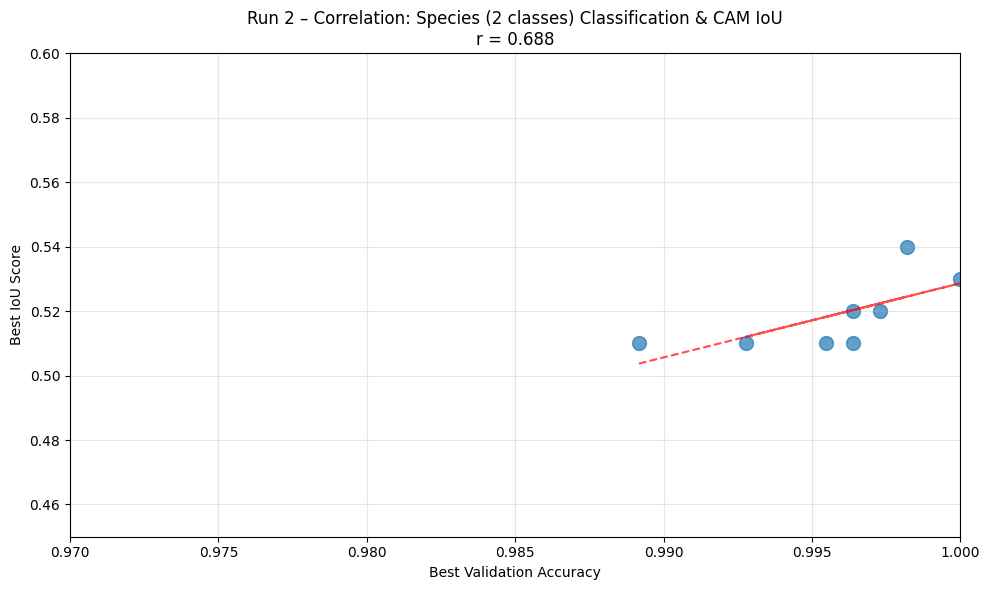


Breed (37 classes) analysis:
Number of models analyzed: 8
                       model  best_validation_acc  best_iou
0          res_breed_bbox_18             0.888087      0.50
1  res_species_breed_bbox_50             0.856498      0.52
2          res_breed_bbox_50             0.880866      0.51
3  res_species_breed_bbox_18             0.902527      0.47
4       res_breed_species_18             0.901625      0.48
5       res_breed_species_50             0.868231      0.50
6               res_breed_50             0.878159      0.53
7               res_breed_18             0.870036      0.50
Pearson correlation: -0.736
P-value: 0.037


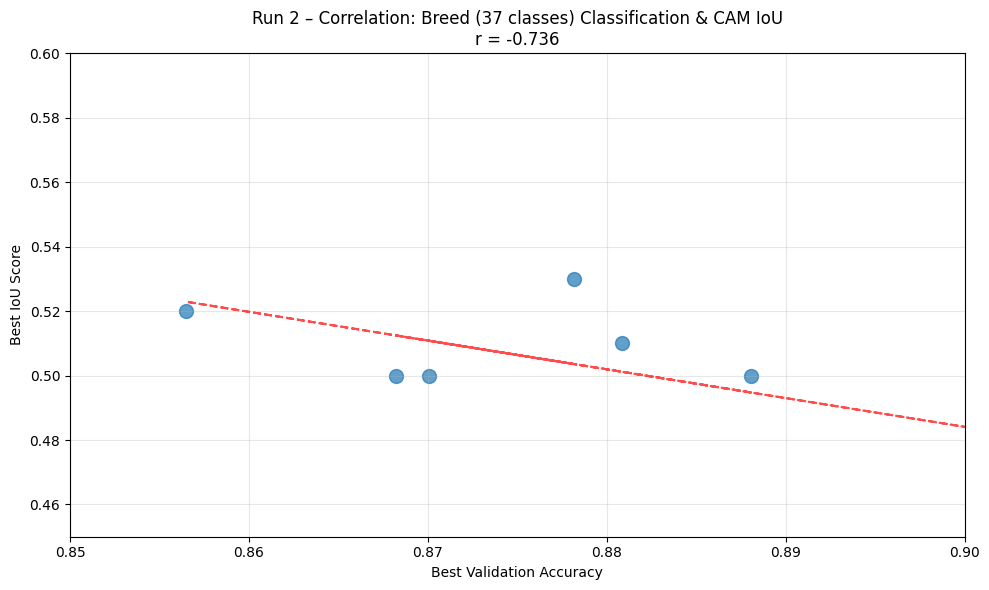

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Load the data
def load_data(run_name: str):
    # Load CAM statistics
    with open("logs/cam_stats_" + run_name + ".json", "r") as f:
        cam_stats = json.load(f)

    run_number = run_name[-1]
    # Load pretraining logs
    with open("logs/pretraining" + run_number + ".json", "r") as f:
        pretraining = json.load(f)

    return cam_stats, pretraining


# Extract best IoU for each model by classifier head
def get_best_iou_scores_by_head(cam_stats, exclude_cnn=False):
    best_iou = {"ClassifierHead(2)": {}, "ClassifierHead(37)": {}}

    for model_name, settings in cam_stats.items():
        # Skip CNN models if exclude_cnn is True
        if exclude_cnn and model_name.startswith("cnn_"):
            continue

        for setting_name, layers in settings.items():
            head = setting_name.split("_")[0].split("-")[0]
            if head not in best_iou:
                continue

            if model_name not in best_iou[head]:
                best_iou[head][model_name] = 0

            for layer in layers:
                best_iou[head][model_name] = max(
                    best_iou[head][model_name], layer["iou"]
                )

    return best_iou


# Extract best validation accuracy for each model by classifier head
def get_best_val_acc_by_head(pretraining, exclude_cnn=False):
    best_acc = {"ClassifierHead(2)": {}, "ClassifierHead(37)": {}}

    for model_name, epochs in pretraining.items():
        # Skip CNN models if exclude_cnn is True
        if exclude_cnn and model_name.startswith("cnn_"):
            continue

        # Find the highest validation accuracy for each head
        for head in best_acc.keys():
            model_best_acc = 0
            for epoch, metrics in epochs.items():
                acc_key = f"val_{head}_Acc"
                if acc_key in metrics:
                    model_best_acc = max(model_best_acc, metrics[acc_key])

            if model_best_acc > 0:  # Only add if model has this head
                best_acc[head][model_name] = model_best_acc

    return best_acc


# Create dataframe for analysis by head
def create_analysis_df_by_head(best_iou, best_acc):
    dataframes = {}

    for head in ["ClassifierHead(2)", "ClassifierHead(37)"]:
        data = []
        for model in set(best_iou[head].keys()) & set(best_acc[head].keys()):
            best_accuracy = best_acc[head][model]

            data.append(
                {
                    "model": model,
                    "best_validation_acc": best_accuracy,
                    "best_iou": best_iou[head][model],
                }
            )
        dataframes[head] = pd.DataFrame(data)

    return dataframes


# Plot the correlation for a specific head
def plot_correlation(df, head_name, title_prefix="", y_range=None, x_range=None):
    display_name = (
        "Species (2 classes)"
        if "ClassifierHead(2)" in head_name
        else "Breed (37 classes)"
    )

    plt.figure(figsize=(10, 6))

    # Create scatter plot
    plt.scatter(df["best_validation_acc"], df["best_iou"], s=100, alpha=0.7)

    # Add model names as labels
    for i, model in enumerate(df["model"]):
        # Adjust vertical position for bbox models
        y_offset = 17 if "species" in model else 7
        # plt.annotate(model,             (df['best_validation_acc'].iloc[i], df['best_iou'].iloc[i]), textcoords="offset points",  xytext=(0, y_offset),  ha='center')

    # Calculate and plot trend line
    if len(df) > 1:
        z = np.polyfit(df["best_validation_acc"], df["best_iou"], 1)
        p = np.poly1d(z)
        plt.plot(
            df["best_validation_acc"], p(df["best_validation_acc"]), "r--", alpha=0.7
        )

        # Calculate Pearson correlation
        corr, p_value = pearsonr(df["best_validation_acc"], df["best_iou"])
        plt.title(
            f"{title_prefix}Correlation: {display_name} Classification & CAM IoU\nr = {corr:.3f}"
        )  # , p = {p_value:.3f}')
    else:
        plt.title(f"{title_prefix}Correlation: {display_name} Classification & CAM IoU")

    plt.xlabel("Best Validation Accuracy")
    plt.ylabel("Best IoU Score")
    plt.grid(True, alpha=0.3)

    # Set axis ranges if provided
    if y_range is not None:
        plt.ylim(y_range)
    if x_range is not None:
        plt.xlim(x_range)

    # Print summary statistics
    print(f"\n{display_name} analysis:")
    print(f"Number of models analyzed: {len(df)}")
    print(df)

    if len(df) > 1:
        print(f"Pearson correlation: {corr:.3f}")
        print(f"P-value: {p_value:.3f}")

    plt.tight_layout()
    plt.show()


# Main analysis
def main():
    exclude_cnn = True
    cam_stats, pretraining = load_data(run_name=run_name)
    best_iou = get_best_iou_scores_by_head(cam_stats, exclude_cnn=exclude_cnn)
    best_acc = get_best_val_acc_by_head(pretraining, exclude_cnn=exclude_cnn)
    dataframes = create_analysis_df_by_head(best_iou, best_acc)

    # Plot correlation for species classification (2 classes)
    plot_correlation(
        dataframes["ClassifierHead(2)"],
        "ClassifierHead(2)",
        title_prefix="Run 2 – ",
        y_range=(0.45, 0.6),
        x_range=(0.97, 1.0),
    )

    # Plot correlation for breed classification (37 classes)
    plot_correlation(
        dataframes["ClassifierHead(37)"],
        "ClassifierHead(37)",
        title_prefix="Run 2 – ",
        y_range=(0.45, 0.6),
        x_range=(0.85, 0.9),
    )


if __name__ == "__main__":
    main()

#### Best CAM viz

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import data
from models import CAMManager, ClassifierHead, ResNetBackbone, TrainedModel
from pre_training import Trainer


def visualize_single_raw_cam_and_mask(img, cam, segment):
    assert cam.shape == segment.shape, (
        "CAM and segment must have the same dimensions (H, W)"
    )
    assert len(cam.shape) == 2 and len(segment.shape) == 2, (
        "Both CAM and segment must be 2D arrays (H,W)"
    )
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    if img is not None:
        # Visualize the image
        axes[0].imshow(img.permute(1, 2, 0).cpu().numpy())
        axes[0].set_title("Image")
        axes[0].axis("off")

    # Visualize the CAM
    im = axes[1].imshow(cam, cmap="jet")
    axes[1].set_title("CAM")
    axes[1].axis("off")
    fig.colorbar(im, ax=axes[1], orientation="vertical", fraction=0.046, pad=0.04)

    # Visualize the segment
    segment_np = segment.cpu().numpy()
    axes[2].imshow(segment_np, cmap="grey")
    axes[2].set_title("Segment")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()


def thresholdCAM(cam: torch.Tensor, threshold: float) -> torch.Tensor:
    """
    Takes in cam tensor (H, W) and a threshold value, returns tensor with values thresholded.
    """
    return (cam > threshold).float()


def getConvLayers(model: nn.Module) -> list[nn.Conv2d]:
    return [m for m in model.modules() if isinstance(m, nn.Conv2d)]


def findConvLayerByIndex(model, index=-1):
    """
    Find a convolutional layer by index in a model.

    Args:
        model: The model to search through
        index: The index of the convolutional layer to return (default is -1, the last layer)

    Returns:
        The convolutional layer at the specified index, or None if not found
    """
    conv_layers = getConvLayers(model)
    if conv_layers:
        return conv_layers[index]
    return None


"""
# Load the ResNet50 model with breed, species, and bbox heads
trainer = Trainer()
backbone = ResNetBackbone(model_type="resnet50")
heads = [ClassifierHead(NUM_SPECIES, adapter="res50"),
         ClassifierHead(NUM_BREEDS, adapter="res50"), 
         BboxHead(adapter="res50")]
trainer.set_model(backbone, heads, "checkpoints/res_species_breed_bbox_50")
trainer.load_checkpoint("checkpoints/res_species_breed_bbox_50_checkpoint_epoch5.pt")

_, loader, _ = data.create_dataloaders(target_type=["species", "segmentation"], batch_size=32)

# Create a model with the species head (index 0)
model = TrainedModel(backbone=trainer.backbone, head=trainer.heads[0])

threshold = 0.2
cam_type = "GradCAM" # Literal['GradCAM', 'ScoreCAM', 'AblationCAM']
conv_layers = getConvLayers(model)
target_layer = conv_layers[46]  # Get layer 46 which has the best IoU according to the instruction

manager = CAMManager(model, loader, target_type="species", target_layer=target_layer, method=cam_type)
images, cams, masks = next(manager.generator) # (images_tensor, cams_tensor, masks_tensor)
assert images.ndim == 4, "Images must have 4 dimensions"
assert cams.ndim == 4, "CAMs must have 4 dimensions"
assert masks.ndim == 4, "Masks must have 4 dimensions"
assert len(images) == len(cams) == len(masks), "Images, CAMs, and masks must have the same length"
"""

# Load the ResNet18 model with breed and species heads
trainer = Trainer()

backbone = ResNetBackbone(model_type="resnet18")
# Create two heads to match the checkpoint (breed, species)
breed_head = ClassifierHead(num_classes=37, adapter="res18")
species_head = ClassifierHead(num_classes=2, adapter="res18")
trainer.set_model(
    backbone,
    [breed_head, species_head],
    "checkpoints/run_2/res_breed_species_18_checkpoint_epoch20.pt",
)
trainer.load_checkpoint("checkpoints/run_2/res_breed_species_18_checkpoint_epoch20.pt")

_, _, loader = data.create_dataloaders(
    target_type=["species", "segmentation"], batch_size=32
)

# Create a model with the species head (index 1)
model = TrainedModel(backbone=trainer.backbone, head=trainer.heads[1])

threshold = 0.2
cam_type = "GradCAM"  # Literal['GradCAM', 'ScoreCAM', 'AblationCAM']
conv_layers = getConvLayers(model)
target_layer = conv_layers[
    18
]  # Use layer 46 which typically has good IoU for ResNet models

manager = CAMManager(
    model,
    loader,
    target_type="species",
    target_layer=target_layer,
    method=cam_type,
    output_size=(64, 64),
)
images, cams, masks = next(
    manager.generator
)  # (images_tensor, cams_tensor, masks_tensor)
assert images.ndim == 4, "Images must have 4 dimensions"
assert cams.ndim == 4, "CAMs must have 4 dimensions"
assert masks.ndim == 4, "Masks must have 4 dimensions"
assert len(images) == len(cams) == len(masks), (
    "Images, CAMs, and masks must have the same length"
)

/Users/User/CODING/ADL_CW2/pre_training.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Checkpoint loaded from checkpoints/run_2/res_breed_species_18_checkpoint_epoch20.pt (epoch 20)
Images already downloaded: oxford_pet_data/images.tar.gz
Annotations already downloaded: oxford_pet_data/annotations.tar.gz
Dataset prepared with 37 classes.
Dataset split complete: training (70.0%), validation (15.0%), testing (15.0%)
Images already downloaded: oxford_pet_data/images.tar.gz
Annotations already downloaded: oxford_pet_data/annotations.tar.gz
Dataset prepared with 37 classes.
Dataset split complete: training (70.0%), validation (15.0%), testing (15.0%)
Images already downloaded: oxford_pet_data/images.tar.gz
Annotations already downloaded: oxford_pet_data/annotations.tar.gz
Dataset prepared with 37 classes.
Dataset split complete: training (70.0%), validation (15.0%), testing (15.0%)


AssertionError: Masks must have 4 dimensions

In [ ]:
for idx in range(0, 32):
    visualize_single_raw_cam_and_mask(
        images[idx], cams[idx].squeeze(0), masks[idx].squeeze(0)
    )